<img src='../../AUXFILE/Layout2.jpeg' alt='Layout' width='110%'></img>

<img src='../../AUXFILE/ADAM_logo3D_transparent.png' alt='Logo Adam' align='right' width='8.5%'></img>
<img src='../../AUXFILE/Reliance-logo.jpg' alt='Logo Reliance' align='left' width='25%'></img>

# **LiCSBAS on Etna Volcano**

## The current workflow is a run of LiCSBAS code to extract the mean ground velocity map and the associated time-series of displacement on Etna Volcano

## Data are available from **COMET-LiCS** Sentinel-1 *InSAR* portal: 

<img src="../../AUXFILE/COMET_Horizontal_Colour-300x113.jpg" width="250" align="up">

<https://comet.nerc.ac.uk/COMET-LiCS-portal/>

LiCSBAS scripts and other information can be accessed here:
<https://github.com/yumorishita/LiCSBAS/>

## Setup of environment variables for LiCSBAS execution and missing libs 

In [1]:
import sys, os
!{sys.executable} -m pip install -r /home/jovyan/MYLICS/requirements.txt
!{sys.executable} -m pip install -r /home/jovyan/MYLICS/LiCSBAS-master/LiCSBAS_requirements.txt


  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)
  Using cached adamapi-2.0.11-py3-none-any.whl (14 kB)
  Using cached astropy-5.1-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (11.1 MB)
  Using cached pyerfa-2.0.0.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (775 kB)


In [2]:
# setup of LiCSBAS environment variables
os.environ ['LICSBAS_PATH']='/home/jovyan/MYLICS/LiCSBAS-master'
a = os.getenv('PATH')
b = os.getenv('LICSBAS_PATH')
c = os.getenv('PYTHONPATH')
os.environ ['PATH'] = f'{a}:{b}/bin'
d = f'{b}/LiCSBAS_lib'
os.environ ['PYTHONPATH'] = f'{c}:{d}'

### check LiCSBAS installation

In [3]:
! LiCSBAS_check_install.py


Python version: 3.8.8
  OK

Check required modues and versions
  astropy(5.1) OK
  bs4(4.9.3) OK
  h5py(3.1.0) OK
  matplotlib(3.5.1) OK
  numpy(1.19.5) OK
  psutil(5.8.0) OK
  requests(2.25.1) OK
  statsmodels(0.12.2) OK
  gdal(3.3.1) OK

Check LiCSBAS commands
  OK

Check LiCSBAS library
  OK

LiCSBAS install is OK



### Authentication in _ADAM_

The following lines of code will show the personal **Adam API-Key** of the user and the endpoint currently in use, that provide access to the products in the related catalogue. At the end of the execution, if the authentication process is successfull the personal token and the expiration time should be returned as outputs.

In [4]:
os.environ ['ADAMAPI_URL'] = 'https://reliance.adamplatform.eu'
os.environ ['ADAMAPI_KEY'] = 'UCQzTNGbuUqO419ChzgfOEXPLLbZ6XxbfvTt3Evm0yc'
print( 'Current EndPoint: ', os.getenv( "ADAMAPI_URL" ) )
print( 'ADAM API-Key: ', os.getenv( "ADAMAPI_KEY" ) )

from adamapi import Auth
a = Auth()
a.authorize()
a.getAuthToken()

Current EndPoint:  https://reliance.adamplatform.eu
ADAM API-Key:  UCQzTNGbuUqO419ChzgfOEXPLLbZ6XxbfvTt3Evm0yc


{'authorization_token': 'afef88df452b47068e9f6cd44375d919',
 'expires_at': '2022-07-04T11:04:21.531Z'}

### <a id=2.Datasets_Discovery></a> Step 2: Datasets discovery

After the authorization, the user can browse the whole catalogue, structured as a JSON object after a pagination process,  displaying all the available datasets. This operation can be executed with the <font color='blue'> **getDatasets()** </font> function without including any argument. Some lines of code should be added to parse the Json object and extract the names of the datasets.The Json object can be handled as a Python dictionary.

In [5]:
from adamapi import Datasets

datasets = Datasets(a)
catalogue = datasets.getDatasets()

#Extracting the size of the catalogue

total = catalogue['properties']['totalResults']
items = catalogue['properties']['itemsPerPage']
pages = total//items

print('----------------------------------------------------------------------')
print('\033[1m' + 'List of available datasets:')
print ('\033[0m')

#Extracting the list of datasets across the whole catalogue

for i in range(0,pages):
    page = datasets.getDatasets(page = i)
    for element in page['content']:
        print(element['title'] + "\033[1m" + " --> datasetId "+ "\033[0m" + "= " + element['datasetId'])

----------------------------------------------------------------------
List of available datasets:

MXD04_L2_ATL --> datasetId = 58787:MXD04_L2_ATL
TDM1_DEM__30_N44E012 --> datasetId = 58788:TDM1_DEM__30_N44E012
MODIS: LST DAY --> datasetId = 58227:MXD11C1_LST_DAY
Sentinel-5P: Aerosol Index (OFFL) --> datasetId = 57076:S5P_OFFL_L2__AER_AI_PRODUCT_AEROSOL_INDEX_340_380
Sentinel-5P: SO2 total column (OFFL) --> datasetId = 57091:S5P_OFFL_L2__SO2____PRODUCT_SULFURDIOXIDE_TOTAL_VERTICAL_COLUMN
CAMS European air quality forecasts: C2H3NO5 --> datasetId = 69619:EU_CAMS_SURFACE_C2H3NO5_G
CAMS European air quality forecasts: CO --> datasetId = 69620:EU_CAMS_SURFACE_CO_G
EU_CAMS_SURFACE_NH3_G --> datasetId = 69621:EU_CAMS_SURFACE_NH3_G
CAMS European air quality forecasts: NMVOC --> datasetId = 69622:EU_CAMS_SURFACE_NMVOC_G
CAMS European air quality forecasts: NO2 --> datasetId = 69623:EU_CAMS_SURFACE_NO2_G
EU_CAMS_SURFACE_NO_G --> datasetId = 69624:EU_CAMS_SURFACE_NO_G
CAMS European air quality 

In [6]:
datasetID = '87614:S1AB_interferograms_unw'

print('\033[1;34m' + 'Metadata of ' + datasetID + ':')
print ('\033[0;0m')

paged = datasets.getDatasets(datasetID)
for i in paged.items():
    print("\033[1m" +  str(i[0]) + "\033[0m" + ': ' + str(i[1]))
    
long_name = paged['title']

Metadata of 87614:S1AB_interferograms_unw:

datasetId: 87614:S1AB_interferograms_unw
creationDate: 2020-09-24T00:00:00Z
dataType: Float32
epsg: 4326
keywords: []
license: {'documentationUrl': '', 'dataProviderName': 'ESA', 'dataProviderUrl': '', 'licenseId': '', 'dataPolicy': '', 'doi': '', 'credits': ''}
maxValue: [157.0796356201172]
minValue: [-201.0619354248047]
noDataValue: 0
numberOfRecords: 4299
profile: {'profileSchema': 'eo_profile_schema.json', 'name': 'Earth Observation', 'mission': 'Sentinel1', 'sensor': 'LiCS', 'processingLevel': '1', 'instrument': '', 'platform': ''}
resolutionUnit: degree
temporalResolution: Irregular
unit: 
unitDescription: 
updateDate: 2022-06-20T10:13:25Z
geometry: {'type': 'Polygon', 'coordinates': [[[13.7981111, 35.7622234], [17.256608, 35.7622234], [17.256608, 38.7927222], [13.7981111, 38.7927222], [13.7981111, 35.7622234]]]}
resolutions: [0.00099999921, 0.0009999992325902]
anyText: 4326,ESA,Daily,ESA
applications: ['Atmosphere']
datasetManager: man

The following command is used to create the folders structure to allow LiCSBAS running correctly. The user must change the adamapi_for_LiCSBAS.py  file filtering per dataset and other features suh as temporal and geographical ones.

In [8]:
!python3 adamapi_for_LiCSBAS.py -ak UCQzTNGbuUqO419ChzgfOEXPLLbZ6XxbfvTt3Evm0yc -ae  https://reliance.adamplatform.eu

Execution Started
Execution Completed


# Let's go with LiCSBAS processing!

## STEP 02 - Multi-looking and data conversion

We start from step 02 of LiCBSAS because the first step is not needed having the data already in ADAM platform

In [9]:
# add librarby for visualise results:
from IPython.display import Image

In [10]:
os.chdir('124D_05291_081406')

In [11]:
# multi-looking and file format conversion
! LiCSBAS02_ml_prep.py -i GEOC -o GEOCml2 -n 2 


LiCSBAS02_ml_prep.py ver1.7.4 20201119 Y. Morishita
LiCSBAS02_ml_prep.py -i GEOC -o GEOCml2 -n 2

Create E.geo
  E.geo created

Create N.geo
  N.geo created

Create U.geo
  U.geo created

Create slc.mli
  No *.geo.mli.tif found in GEOC

Create hgt
  hgt[.png] created

Create unw and cc
  8 parallel processing...
    0/200th IFG...
   50/200th IFG...
   30/200th IFG...
   10/200th IFG...
   40/200th IFG...
   20/200th IFG...
   70/200th IFG...
  100/200th IFG...
   80/200th IFG...
   60/200th IFG...
  110/200th IFG...
   90/200th IFG...
  140/200th IFG...
  120/200th IFG...
  150/200th IFG...
  130/200th IFG...
  160/200th IFG...
  190/200th IFG...
  170/200th IFG...
  180/200th IFG...

Create slc.mli.par

Create EQA.dem_par

Copy baselines file

Elapsed time: 00h 03m 46s

LiCSBAS02_ml_prep.py Successfully finished!!

Output directory: GEOCml2



## STEP 04&03 - Optonal steps for atmo correction wiht GACOS and masking undesired areas

In [12]:
# these steps have been skipped
# LiCSBAS03op_GACOS.py
# LiCSBAS04op_mask_unw.py

## STEP 05 - Clip data over the AOI

In [13]:
#clip data around Etna volcano
! LiCSBAS05op_clip_unw.py -i GEOCml2 -o GEOCclip -g 14.7/15.3/37.44/37.95
# and check the data clipped...


LiCSBAS05op_clip_unw.py ver1.2.5 20210105 Y. Morishita
LiCSBAS05op_clip_unw.py -i GEOCml2 -o GEOCclip -g 14.7/15.3/37.44/37.95

Area to be clipped:
  0:1683/0:1402 -> 933:1234/147:403
  12.8336115/16.1986086/35.4403348/38.2433319 ->
  14.7001646/15.3003424/37.4390458/37.9492273
  Width/Length: 1683/1402 -> 301/256

Clip E.geo
Clip N.geo
Clip U.geo
Copy baselines
Clip hgt
Recreate hgt.png

Clip unw and cc
  8 parallel processing...
    0/200th unw...
  100/200th unw...

Elapsed time: 00h 00m 39s

LiCSBAS05op_clip_unw.py Successfully finished!!

Output directory: GEOCclip



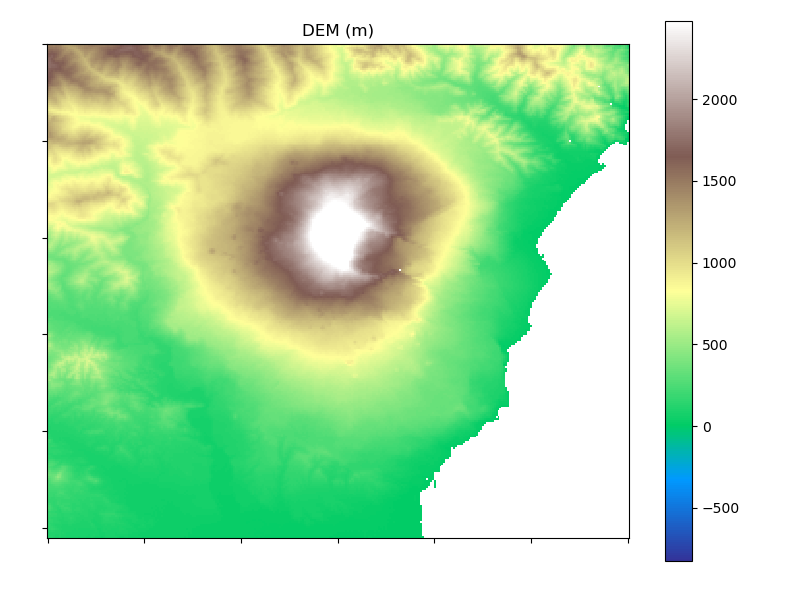

In [14]:
Image(filename='GEOCclip/hgt.png') 

## STEP 11 - Quality check

In [15]:
# quality check
#! LiCSBAS11_check_unw.py -h
! LiCSBAS11_check_unw.py -d GEOCclip -c 0.1 -u 0.3


LiCSBAS11_check_unw.py ver1.3.3 20210402 Y. Morishita
LiCSBAS11_check_unw.py -d GEOCclip -c 0.1 -u 0.3

coh_thre     : 0.1
unw_cov_thre : 0.3

Size         : 301 x 256

Reading unw and cc data...
    0/200th unw to identify valid area...
  100/200th unw to identify valid area...
    0/200th cc and unw...
  100/200th cc and unw...

0/200 ifgs are discarded from further processing.
ifg dates        unw_cov coh_av

Check network/*, 11bad_ifg_ras/* and 11ifg_ras/* in TS dir.
If you want to change the bad ifgs to be discarded, re-run with different thresholds or make a ifg list and indicate it by --rm_ifg_list option in the next step.

Elapsed time: 00h 00m 05s

LiCSBAS11_check_unw.py Successfully finished!!

Output directory: TS_GEOCclip



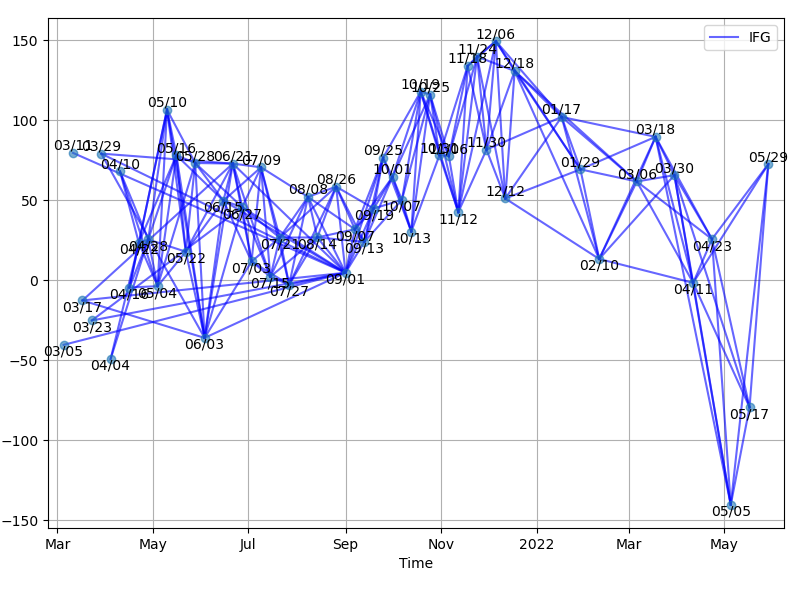

In [16]:
# check network after step 11
Image(filename='TS_GEOCclip/network/network11.png')

In [18]:
# check outputs of step 11
# list of bad ifg
!  head -n 10 TS_GEOCclip/info/11bad_ifg.txt

In [ ]:
# ... and visualize some of them: change the ifg pair!!!
Image(filename='TS_GEOCclip/11bad_ifg_ras/20210128_20210209.unw.png')

## STEP 12 - Loop closure analysis

In [19]:
# loop closure analysis
!LiCSBAS12_loop_closure.py -d GEOCclip -t TS_GEOCclip -l 1.5 --multi_prime


LiCSBAS12_loop_closure.py ver1.6.1 20210405 Y. Morishita
LiCSBAS12_loop_closure.py -d GEOCclip -t TS_GEOCclip -l 1.5 --multi_prime

loop_thre : 1.5 rad

1st Loop closure check and make png for all possible 268 loops,
with 8 parallel processing...
    0/268th loop...
/home/jovyan/MYLICS/LiCSBAS-master/LiCSBAS_lib/LiCSBAS_tools_lib.py:431: UserWarning: Trying to register the cmap 'SCM.romaO' which already exists.
  plt.cm.register_cmap(name = cmap_name, cmap = _cmap)
/home/jovyan/MYLICS/LiCSBAS-master/LiCSBAS_lib/LiCSBAS_tools_lib.py:431: UserWarning: Trying to register the cmap 'SCM.romaO' which already exists.
  plt.cm.register_cmap(name = cmap_name, cmap = _cmap)
/home/jovyan/MYLICS/LiCSBAS-master/LiCSBAS_lib/LiCSBAS_tools_lib.py:431: UserWarning: Trying to register the cmap 'SCM.romaO' which already exists.
  plt.cm.register_cmap(name = cmap_name, cmap = _cmap)
/home/jovyan/MYLICS/LiCSBAS-master/LiCSBAS_lib/LiCSBAS_tools_lib.py:431: UserWarning: Trying to register the cmap 'SCM.vik'

In [20]:
# check outputs of step 12
# list of bad ifg
!  head -n 10 TS_GEOCclip/info/12bad_ifg.txt

20210317_20210603
20210317_20210621
20210317_20210901
20210323_20210627
20210323_20210901
20210329_20210603
20210329_20210621
20210329_20210901
20210504_20210528
20211001_20211025


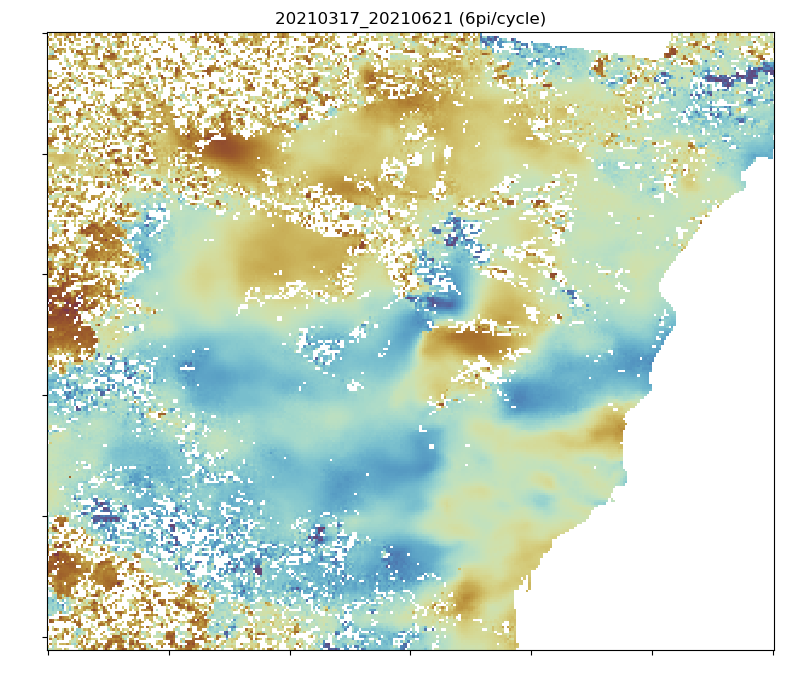

In [21]:
# ... and visualize some of them: change the ifg pair!!!
Image(filename='TS_GEOCclip/12bad_ifg_ras/20210317_20210621.unw.png')

In [22]:
#check triplet too ...
! ls TS_GEOCclip/12loop/bad_loop_png/

20210317_20210603_20210621_loop.png  20210504_20210510_20210528_loop.png
20210317_20210603_20210901_loop.png  20210504_20210516_20210528_loop.png
20210317_20210621_20210901_loop.png  20210504_20210522_20210528_loop.png
20210323_20210627_20210901_loop.png  20211001_20211007_20211025_loop.png
20210329_20210603_20210621_loop.png  20211001_20211013_20211025_loop.png
20210329_20210603_20210901_loop.png  20211001_20211019_20211025_loop.png
20210329_20210621_20210901_loop.png


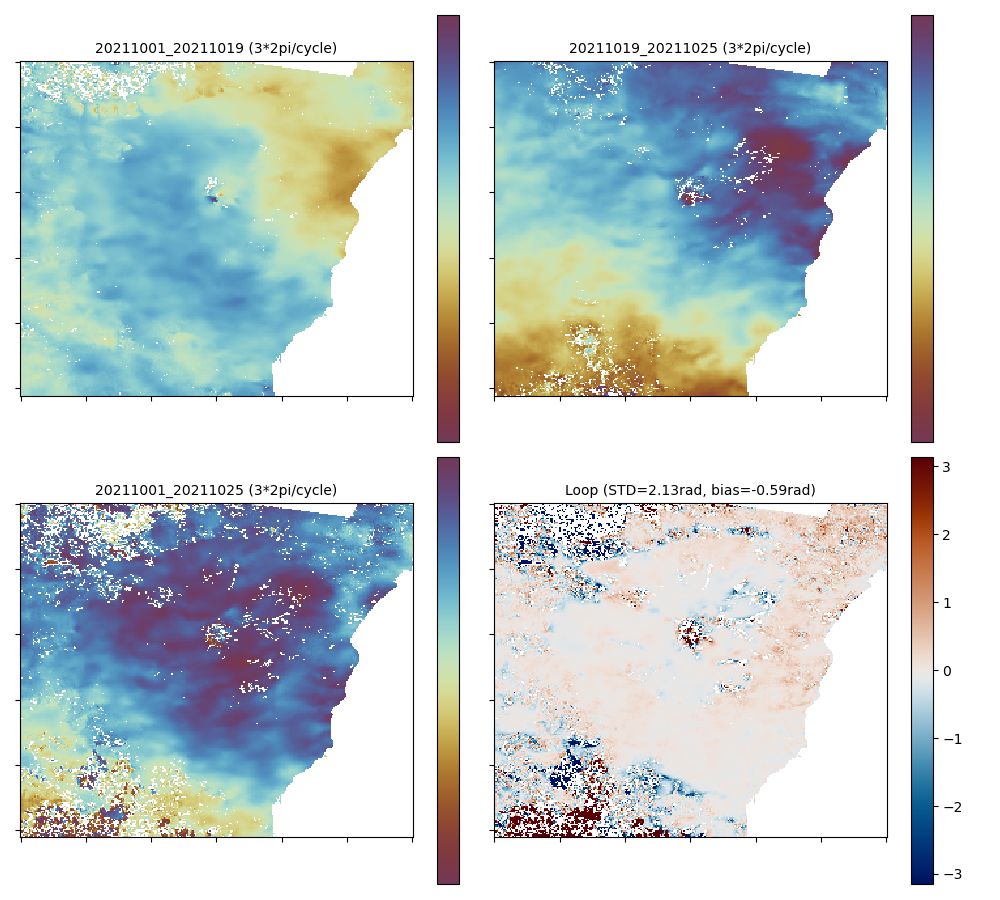

In [23]:
# ... and visualize some of them: 
Image(filename='TS_GEOCclip/12loop/bad_loop_png/20211001_20211019_20211025_loop.png')

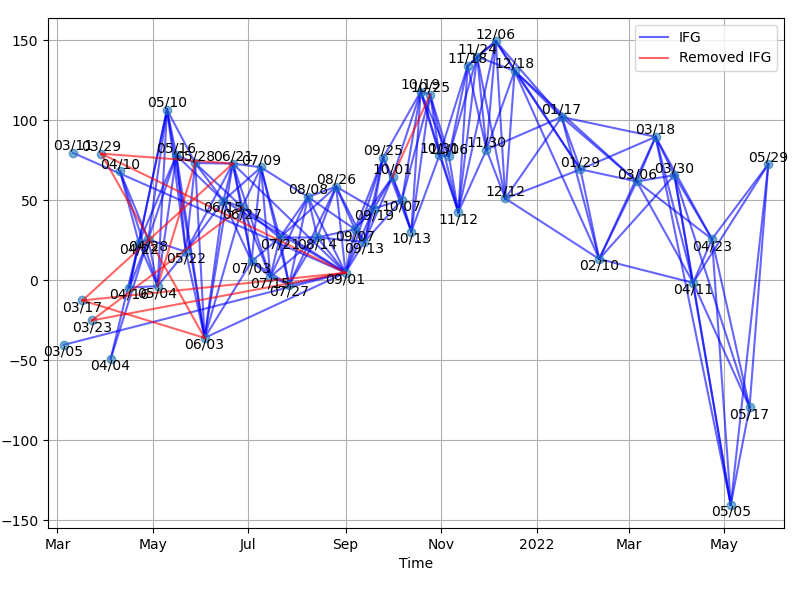

In [24]:
# check network after step 12
Image(filename='TS_GEOCclip/network/network12.png')

## STEP 13 - SVD inversion


LiCSBAS13_sb_inv.py ver1.5.2 20210311 Y. Morishita
LiCSBAS13_sb_inv.py -d GEOCclip -t TS_GEOCclip

In geographical coordinates
Read cum data on memory (fast but need memory).

Size of image (w,l)    : 301, 256
# of all images        : 57
# of images to be used : 54
# of all ifgs          : 200
# of ifgs to be used   : 190
# of removed ifgs      : 10
Threshold of used unw  : 54

Reference area (X/Y)   : 92:93/159:160
Allowed memory size    : 8000 MB
Number of patches      : 1
Inversion algorism     : LS
Gamma value            : 0.0001

Process 256/256th line (1/1th patch)...
  Reading 190 ifg's unw data...
  12853/77056 points removed due to not enough ifg data...

  Identifing gaps, and counting n_gap and n_ifg_noloop,
  with 8 parallel processing...
    Running  1/ 8th patch...
    Running  2/ 8th patch...
    Running  3/ 8th patch...
    Running  4/ 8th patch...
    Running  6/ 8th patch...
    Running  5/ 8th patch...
    Running  7/ 8th patch...
    Running  8/ 8th patch...

  Sma

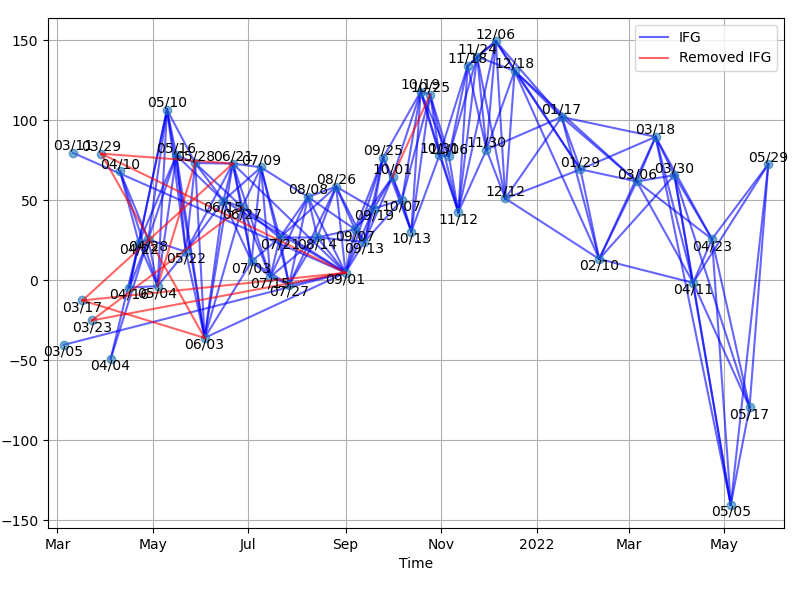

In [25]:
# SVD inversion
! LiCSBAS13_sb_inv.py -d GEOCclip -t TS_GEOCclip 
# check network after step 13
Image(filename='TS_GEOCclip/network/network13.png')

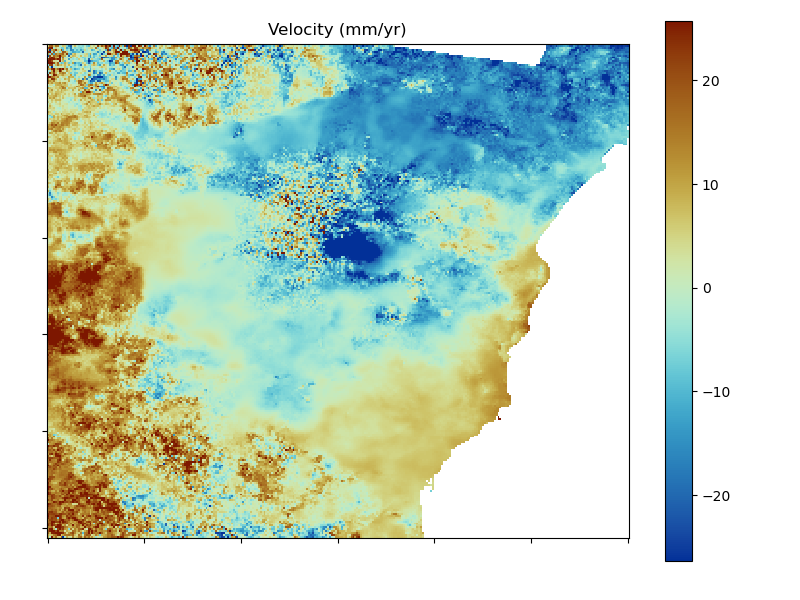

In [26]:
# and see the first estimation of velocity
Image(filename='TS_GEOCclip/results/vel.png')

## STEP 14 - Estimate of Standard deviation of veloctites

In [27]:
# bootstrap for Velocity error estimation
! LiCSBAS14_vel_std.py -t TS_GEOCclip


LiCSBAS14_vel_std.py ver1.2 20210309 Y. Morishita
LiCSBAS14_vel_std.py -t TS_GEOCclip

Process 256/256th line (1/1th patch)...
  Calculating STC...
  12853/77056 points removed due to no data...
  Calculating std of velocity by bootstrap...
  Running 100/100th bootstrap...
  Elapsed time for 1th patch: 31 sec

Output png images...

Elapsed time: 00h 00m 31s

LiCSBAS14_vel_std.py Successfully finished!!

Output directory: TS_GEOCclip



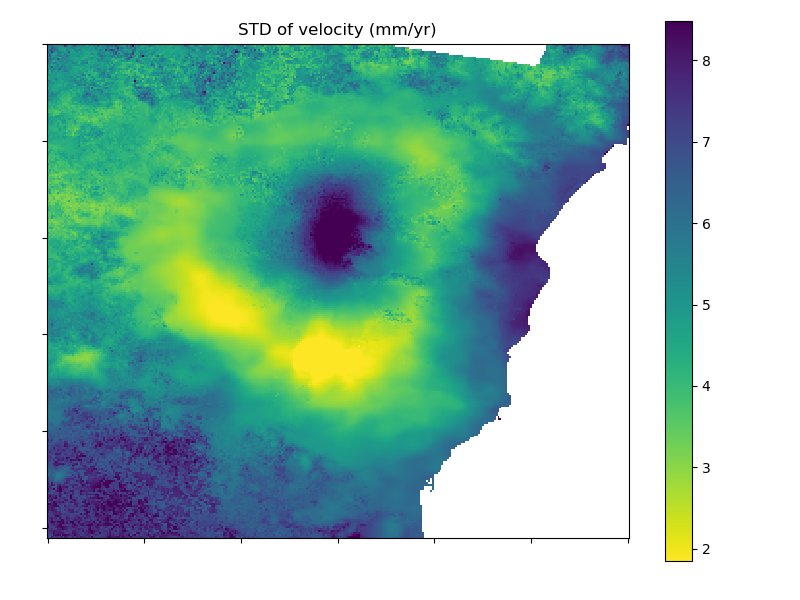

In [28]:
# and see the estimation of velocity error
Image(filename='TS_GEOCclip/results/vstd.png')

## STEP 15 and 16 - Masking and Filtering
#### These two steps can be executed several times changing the input parameters, in order to identify the best final solution

In [29]:
# masking time serires
! LiCSBAS15_mask_ts.py -h


LiCSBAS15_mask_ts.py ver1.8.1 20200911 Y. Morishita
LiCSBAS15_mask_ts.py -h

v1.8.1 20200911 Yu Morishita, GSI

Overview
This script makes a mask for time series using several noise indices. The pixel is masked if any of the values of the noise indices for a pixel is worse (larger or smaller) than a specified threshold.

Input & output files
Inputs in TS_GEOCml*/ :
 - results/[vel, coh_avg, n_unw, vstd, maxTlen, n_gap, stc,
            n_ifg_noloop, n_loop_err, resid_rms]
 - info/13parameters.txt
 
Outputs in TS_GEOCml*/
 - mask_ts[_mskd].png : Quick-look image of mask and noise indices
 - results/
   - vel.mskd[.png]   : Masked velocity
   - mask[.png]       : Mask
 - info/15parameters.txt : List of used parameters

=====
Usage
=====
LiCSBAS15_mask_ts.py -t tsadir [-c coh_thre] [-u n_unw_r_thre] [-v vstd_thre]
  [-T maxTlen_thre] [-g n_gap_thre] [-s stc_thre] [-i n_ifg_noloop_thre]
  [-l n_loop_err_thre] [-r resid_rms_thre] [--vmin float] [--vmax float]
  [--keep_isolated] [--noautoa


LiCSBAS15_mask_ts.py ver1.8.1 20200911 Y. Morishita
LiCSBAS15_mask_ts.py -t TS_GEOCclip -c 0.3 -u 1.5 -v 50 -T 1 -g 10 -s 5 -i 50 -l 5 -r 3

Noise index    : Threshold  (rate to be masked)
- coh_avg      :  0.3       (47.8%)
- n_unw        :   85       ( 0.0%)
- vstd         : 50.0 mm/yr ( 0.0%)
- maxTlen      :  1.0 yr    ( 0.2%)
- n_gap        :   10       ( 0.0%)
- stc          :  5.0 mm    ( 0.7%)
- n_ifg_noloop :   50       ( 0.0%)
- n_loop_err   :    5       (12.9%)
- resid_rms    :  3.0 mm    ( 7.1%)

Masked pixels  : 33367/64202 (52.0%)
Kept pixels    : 30835/64202 (48.0%)


Elapsed time: 00h 00m 02s

LiCSBAS15_mask_ts.py Successfully finished!!

Output png: TS_GEOCclip/mask_ts.png



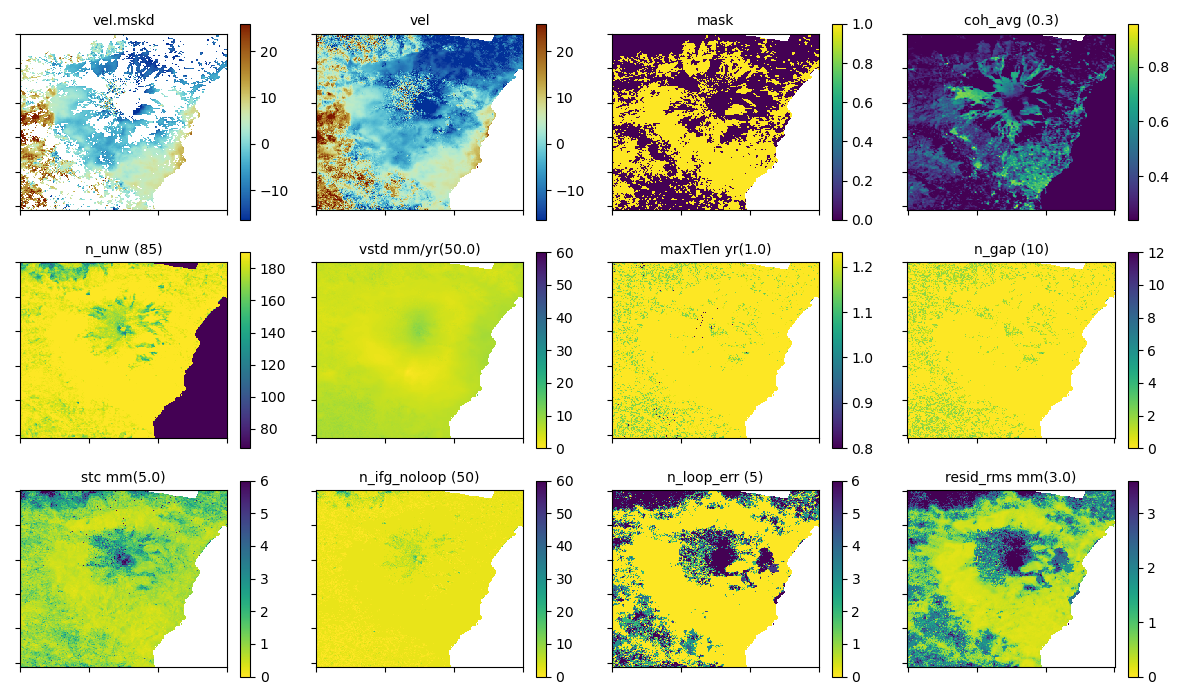

In [29]:
# masking time serires
! LiCSBAS15_mask_ts.py -t TS_GEOCclip -c 0.3 -u 1.5 -v 50 -T 1 -g 10 -s 5 -i 50 -l 5 -r 3
Image(filename='TS_GEOCclip/mask_ts.png')


LiCSBAS16_filt_ts.py ver1.5.1 20210311 Y. Morishita
LiCSBAS16_filt_ts.py -t TS_GEOCclip -s 2 --hgt_linear --hgt_min 500 --hgt_max 2000

Size of image (w,l)      : 301, 256
Number of images         : 54
Width of filter in space : 2.0 km (11.3x9.0 pixel)
Width of filter in time  : 0.070 yr (25 days)
Deramp flag              : []
hgt-linear flag          : True
Minimum hgt              : 500 m
Maximum hgt              : 2000 m

Estimate hgt-linear component,
with 8 parallel processing...
    0/ 54th image...
   10/ 54th image...
   20/ 54th image...
   30/ 54th image...
   40/ 54th image...
   50/ 54th image...

Create png for increment with 8 parallel processing...

HP filter in time, LP filter in space,
with 8 parallel processing...
    0/ 54th image...
   10/ 54th image...
   20/ 54th image...
   30/ 54th image...
   40/ 54th image...
   50/ 54th image...

Create png for increment with 8 parallel processing...

Find stable reference point...
Selected ref: 168:169/231:232

Calculate ve

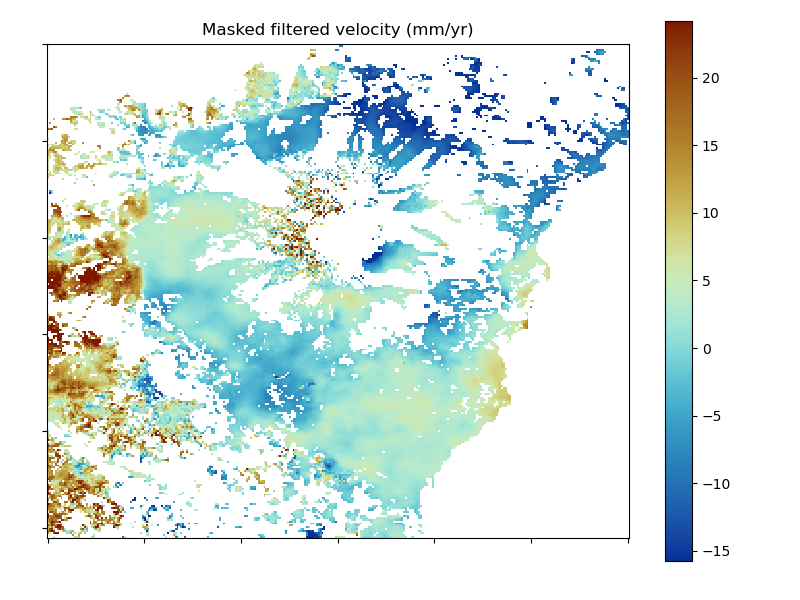

In [30]:
# filtering!
! LiCSBAS16_filt_ts.py -t TS_GEOCclip -s 2 --hgt_linear --hgt_min 500 --hgt_max 2000
Image(filename='TS_GEOCclip/results/vel.filt.mskd.png')

## Create my own map of velocity with preferred colorbar and velo ranges
#### And export final velocity to geotiff


LiCSBAS_disp_img.py ver1.11.0 20210205 Y. Morishita
LiCSBAS_disp_img.py -i TS_GEOCclip/results/vel.filt.mskd -p TS_GEOCclip/info/EQA.dem_par -c jet --cmin -40 --cmax 40 --png velo_final.png

Output: velo_final.png


LiCSBAS_flt2geotiff.py ver1.5.1 20210209 Y. Morishita
LiCSBAS_flt2geotiff.py -i TS_GEOCclip/results/vel.filt.mskd -p TS_GEOCclip/info/EQA.dem_par -o mean_ground_velo.tiff --nan2zero
Use gdal module

Elapsed time: 00h 00m 00s

LiCSBAS_flt2geotiff.py Successfully finished!!

Output: mean_ground_velo.tiff



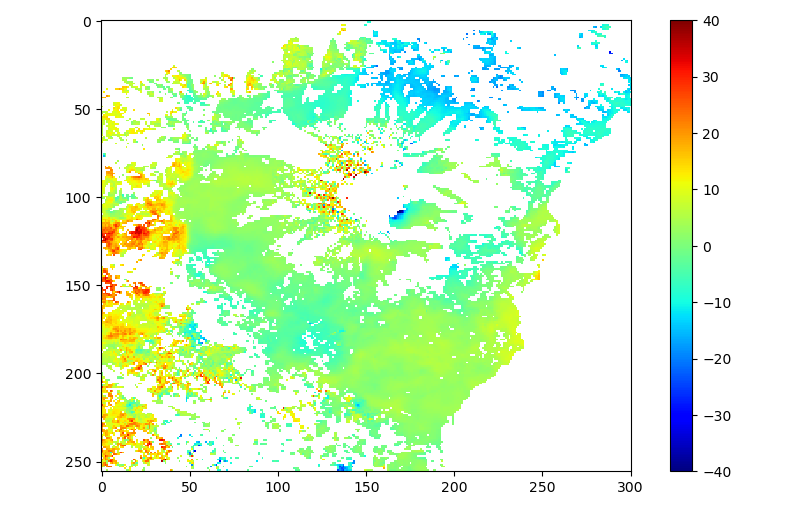

In [31]:
# create my own map of velocity

! LiCSBAS_disp_img.py -i TS_GEOCclip/results/vel.filt.mskd -p  TS_GEOCclip/info/EQA.dem_par -c jet --cmin -40 --cmax 40 --png velo_final.png


#! LiCSBAS_flt2geotiff.py -i infile -p dempar -o outfile --nan2zero
! LiCSBAS_flt2geotiff.py -i  TS_GEOCclip/results/vel.filt.mskd -p  TS_GEOCclip/info/EQA.dem_par -o mean_ground_velo.tiff --nan2zero

Image(filename='velo_final.png')

## Packing the final results 

In [32]:
# zip the final h5 file 
! tar -czf Etna_results.tar.gz TS_GEOCclip/cum_filt.h5
print('DONE')

DONE


# Now you are ready to create your Research Object...

In [34]:
!pip install rohub
import rohub

  Using cached rohub-1.0.7-py3-none-any.whl


In [35]:
ro_user = open("/home/jovyan/rohub_user").read().rstrip()
ro_pwd = open("/home/jovyan/rohub_password").read().rstrip()
rohub.login(username=ro_user, password=ro_pwd)

Logged successfully as christian.bignami@ingv.it.


In [36]:
myros=rohub.list_my_ros()
myros[0:10]

,identifier,title,description,type,research_areas,status,created_on,created_by,modified_on,access_mode,owner,creation_mode,shared_link
0,8b715b0d-b5bb-4d6a-9228-704ec87652f2,Sentinel-1 InSAR ground velocity of Etna Volca...,This Research Object reports the results of a ...,Data-centric Research Object,[Earth sciences],LIVE,2022-02-16T16:10:01.055517+00:00,christian.bignami@ingv.it,2022-03-19T08:45:31.031256+00:00,PUBLIC,christian.bignami@ingv.it,MANUAL,https://w3id.org/ro-id/8b715b0d-b5bb-4d6a-9228...


In [37]:
#check the possible types of RO and Research Areas
rohub.list_valid_ros_types()

['Basic Research Object',
 'Bibliography-centric Research Object',
 'Data-centric Research Object',
 'Executable Research Object',
 'Process-centric Research Object',
 'Service-centric Research Object',
 'Software-centric Research Object',
 'Workflow-centric Research Object']

In [38]:
rohub.list_valid_templates()


[None,
 'Bibliography Centric Research Object folders structure',
 'Data Centric Research Object folders structure',
 'Executable Research Object folders structure',
 'Workflow Centric Research Object folders structure']

In [39]:
rohub.list_valid_resource_types()

['Annotation Collection',
 'Audio',
 'Beanshell Script',
 'Bibliographic Resource',
 'Book',
 'Book section',
 'Command Line Tool',
 'Computational workflow',
 'Conclusion',
 'Conference paper',
 'Course',
 'Creative work',
 'Data Cube Collection',
 'Data Cube Product',
 'Data management plan',
 'Dataset',
 'Diagram',
 'Document',
 'Drawing',
 'Example Run',
 'Figure',
 'File',
 'How to',
 'Hypothesis',
 'Image',
 'Journal article',
 'Jupyter Notebook',
 'Lesson',
 'Meeting Minutes',
 'Other',
 'Paper',
 'Patent',
 'Photo',
 'Physical object',
 'Plot',
 'Poster',
 'Preprint',
 'Presentation',
 'Process',
 'Process Run',
 'Project deliverable',
 'Project milestone',
 'Proposal',
 'Prospective Run',
 'Publication',
 'Python Script',
 'R Script',
 'Report',
 'Research Object',
 'Research Question',
 'REST Service',
 'Result',
 'Result Generation Run',
 'Script',
 'Sketch',
 'SOAP Service',
 'Software',
 'Software documentation',
 'Software source code',
 'Taxonomic treatment',
 'Technical

In [41]:
ro_title='DEMO RELIANCE Sentinel-1 InSAR ground velocity of Etna Volcano'
ro_research_areas='Earth sciences'
ro_description='This is a demo excercise to show how to create a RO within JN based on LiCSBAS'  
ro_ros_type='Data-centric Research Object'
ro = rohub.ros_create(title=ro_title, research_areas=ro_research_areas, description=ro_description, ros_type=ro_ros_type, use_template=True)

Research Object was successfully created with id = ce99b754-59ed-4c08-9737-f39d7540f27a


In [42]:
myros=rohub.list_my_ros()
myros[0:10]

,identifier,title,description,type,research_areas,status,created_on,created_by,modified_on,access_mode,owner,creation_mode,shared_link
0,ce99b754-59ed-4c08-9737-f39d7540f27a,DEMO RELIANCE Sentinel-1 InSAR ground velocity...,['This is a demo excercise to show how to crea...,Data-centric Research Object,[Earth sciences],LIVE,2022-07-04T13:06:06.932201+00:00,christian.bignami@ingv.it,2022-07-04T13:06:07.299874+00:00,PUBLIC,christian.bignami@ingv.it,MANUAL,https://w3id.org/ro-id/ce99b754-59ed-4c08-9737...
1,8b715b0d-b5bb-4d6a-9228-704ec87652f2,Sentinel-1 InSAR ground velocity of Etna Volca...,This Research Object reports the results of a ...,Data-centric Research Object,[Earth sciences],LIVE,2022-02-16T16:10:01.055517+00:00,christian.bignami@ingv.it,2022-03-19T08:45:31.031256+00:00,PUBLIC,christian.bignami@ingv.it,MANUAL,https://w3id.org/ro-id/8b715b0d-b5bb-4d6a-9228...


In [44]:
myros.loc[0]

identifier                     ce99b754-59ed-4c08-9737-f39d7540f27a
title             DEMO RELIANCE Sentinel-1 InSAR ground velocity...
description       ['This is a demo excercise to show how to crea...
type                                   Data-centric Research Object
research_areas                                     [Earth sciences]
status                                                         LIVE
created_on                         2022-07-04T13:06:06.932201+00:00
created_by                                christian.bignami@ingv.it
modified_on                        2022-07-04T13:06:07.299874+00:00
access_mode                                                  PUBLIC
owner                                     christian.bignami@ingv.it
creation_mode                                                MANUAL
shared_link       https://w3id.org/ro-id/ce99b754-59ed-4c08-9737...
Name: 0, dtype: object

In [8]:
# load the RO if I want to udpate/edit an existing RO
#ro_id=myros.loc[0,"identifier"]
#ro=rohub.ros_load(identifier=ro_id)

Research Object was successfully loaded with id = 8b715b0d-b5bb-4d6a-9228-704ec87652f2


We can update or add RO features wiht the **ro.update** command ...

In [45]:
# we can update or add RO features wiht the update command

ro.description="This Research Object is a DEMO for RELIANCE project"
ro.update()

{'identifier': 'ce99b754-59ed-4c08-9737-f39d7540f27a',
 'shared_link': 'https://w3id.org/ro-id/ce99b754-59ed-4c08-9737-f39d7540f27a',
 'title': 'DEMO RELIANCE Sentinel-1 InSAR ground velocity of Etna Volcano',
 'description': 'This Research Object is e DEMO for RELIANCE project',
 'status': 'LIVE',
 'access_mode': 'PUBLIC',
 'type': 'Data-centric Research Object',
 'template': 'Data Centric Research Object folders structure',
 'created': '2022-07-04T13:06:06.932201Z',
 'creator': 'christian.bignami@ingv.it',
 'modificator': 'christian.bignami@ingv.it',
 'modified': '2022-07-04T13:08:15.607048Z',
 'importer': None,
 'research_areas': ['Earth sciences'],
 'owner': 'christian.bignami@ingv.it',
 'editors': [],
 'readers': [],
 'rating': '0.00',
 'number_of_ratings': 0,
 'number_of_likes': 0,
 'number_of_dislikes': 0,
 'completeness': 0,
 'size': 4107,
 'creation_mode': 'MANUAL',
 'doi': None,
 'resource_storage': 'DEFAULT',
 'api_link': 'https://api.rohub.org/api/ros/ce99b754-59ed-4c08-973

In [46]:
ro.show_metadata()


{'identifier': 'ce99b754-59ed-4c08-9737-f39d7540f27a',
 'shared_link': 'https://w3id.org/ro-id/ce99b754-59ed-4c08-9737-f39d7540f27a',
 'title': 'DEMO RELIANCE Sentinel-1 InSAR ground velocity of Etna Volcano',
 'description': "['This is a demo excercise to show how to create a RO within JN based on LiCSBAS']",
 'status': 'LIVE',
 'access_mode': 'PUBLIC',
 'type': 'Data-centric Research Object',
 'template': 'Data Centric Research Object folders structure',
 'created': '2022-07-04T13:06:06.932201Z',
 'creator': 'christian.bignami@ingv.it',
 'modificator': None,
 'modified': '2022-07-04T13:06:07.299874Z',
 'importer': None,
 'research_areas': ['Earth sciences'],
 'owner': 'christian.bignami@ingv.it',
 'editors': [],
 'readers': [],
 'rating': '0.00',
 'number_of_ratings': 0,
 'number_of_likes': 0,
 'number_of_dislikes': 0,
 'completeness': 0,
 'size': 0,
 'creation_mode': 'MANUAL',
 'doi': None,
 'resource_storage': 'DEFAULT',
 'api_link': 'https://api.rohub.org/api/ros/ce99b754-59ed-4c0

In [47]:
# to add the location of the analysed area: already create da GEOJSON file :-)
ro.add_geolocation(body_specification_json="/home/jovyan/Etna_RO_LiCSBAS/mybox.geojson") 

{'identifier': '48066a64-7d62-44f4-b24c-9d7837ee46bb',
 'shared_link': 'https://w3id.org/ro-id/ce99b754-59ed-4c08-9737-f39d7540f27a/annotations/48066a64-7d62-44f4-b24c-9d7837ee46bb',
 'name': 'annotations/48066a64-7d62-44f4-b24c-9d7837ee46bb',
 'filename': '.ro/annotations/48066a64-7d62-44f4-b24c-9d7837ee46bb.ttl',
 'relation': False,
 'read_only': False,
 'target': 'ce99b754-59ed-4c08-9737-f39d7540f27a',
 'ro': 'ce99b754-59ed-4c08-9737-f39d7540f27a',
 'resources': [],
 'created': '2022-07-04T13:12:42.987700+0000',
 'creator': 'christian.bignami@ingv.it',
 'modificator': None,
 'modified': '2022-07-04T13:12:42.987635+0000',
 'authors_credits': ['christian.bignami@ingv.it'],
 'contributors_credits': [],
 'api_link': 'https://api.rohub.org/api/annotations/48066a64-7d62-44f4-b24c-9d7837ee46bb/'}

In [48]:
myfolders = ro.list_folders()
myfolders

,identifier,name,description,creator,created_on,modified_on,path
0,37b772e7-89b5-4202-812b-0c99fe4f26ba,biblio,None,christian.bignami@ingv.it,2022-07-04T13:06:07.474068+0000,2022-07-04T13:06:07.476077+0000,biblio
1,aa666bbd-2fbf-4cc7-be2a-d7ad8c9d95e8,data,None,christian.bignami@ingv.it,2022-07-04T13:06:07.474617+0000,2022-07-04T13:06:07.476316+0000,data
2,e783cc98-dd75-45fc-bfc3-d5c96cc571fe,metadata,None,christian.bignami@ingv.it,2022-07-04T13:06:07.474778+0000,2022-07-04T13:06:07.476495+0000,metadata
3,0391e805-7c40-4987-a6f0-2565f219a48c,raw data,None,christian.bignami@ingv.it,2022-07-04T13:06:07.474917+0000,2022-07-04T13:06:07.476757+0000,raw data


In [52]:
os.getcwd()

'/home/jovyan/MYLICS/DEMO-RELIANCE/124D_05291_081406'

In [49]:
# add a resource
resorce1_type="Result" 
resorce1_title="My demo LiCSBAS output"
resource1_description="This file is a structured h5 file, containing all the results of my InSAR processing"
res_folder="data"
res1_path="Etna_results.tar.gz"
ro.add_internal_resource(res_type=resorce1_type,folder=res_folder, file_path=res1_path, title=resorce1_title, description=resource1_description)

Resource was successfully created with id = 3935ed2f-983f-4805-8092-10ab5639aaf1


Resource(identifier=3935ed2f-983f-4805-8092-10ab5639aaf1, post_request=False)

In [50]:
# add a resource
resource2_type="Sketch"
resource2_title="Etna mean ground velocity map from LiCSBAS processing"
resource2_path="velo_final.png"
res2_folder="metadata"
ro.add_internal_resource(res_type=resource2_type,folder=res2_folder , file_path=resource2_path, title=resource2_title)


Resource was successfully created with id = 7664a030-b8ad-40cb-b503-9ddb0ae9960f


Resource(identifier=7664a030-b8ad-40cb-b503-9ddb0ae9960f, post_request=False)

In [51]:
# add the JN
resource3_type="Jupyter Notebook"
resource3_title="Jupyter Notebook used to process SAR data based on LiCSBAS method"
resource3_path="home/jovyan/MYLICS/DEMO-RELIANCE/ETNA+ADAM+LiCSBAS.ipynb"
res3_folder="metadata"
ro.add_internal_resource(res_type=resource3_type,folder=res3_folder,file_path=resource3_path, title=resource3_title)

FileNotFoundError: [Errno 2] No such file or directory: '../MYLICS/DEMO-RELIANCE/ETNA+ADAM+LiCSBAS.ipynb'

In [12]:
# risorsa geotiff della mappa finale
resource4_type="Result"
resource4_title="Final mean ground velocity map by LiCSBAS method in GEOTiff"
resource4_path="../MYLICS/124D_05291_081406/mean_ground_velo.tiff"
res4_folder="data"
ro.add_internal_resource(res_type=resource4_type,folder=res4_folder,file_path=resource4_path, title=resource4_title)

Resource was successfully created with id = 9d318340-e188-4727-8f0c-c90287696f6e


Resource(identifier=9d318340-e188-4727-8f0c-c90287696f6e, post_request=False)

In [22]:
# risorsa: lista delle date usate
res5_type="File"
res5_title="List of the used images"
res5_path="../MYLICS/124D_05291_081406/TS_GEOCclip/info/13used_image.txt"
res5_folder="metadata"
ro.add_internal_resource(res_type=res5_type,folder=res5_folder,file_path=res5_path, title=res5_title)
# risorsa: punto di riferimnento
res6_type="File"
res6_title="Reference point in KML format"
res6_path="../MYLICS/124D_05291_081406/TS_GEOCclip/info/13ref.kml"
res6_folder="metadata"
ro.add_internal_resource(res_type=res6_type,folder=res6_folder,file_path=res6_path, title=res6_title)
# risorsa: connection graph
res7_type="Image"
res7_title="Final connection graph"
res7_path="../MYLICS/124D_05291_081406/TS_GEOCclip/network/network13_nobad.png"
res7_folder="metadata"
ro.add_internal_resource(res_type=res7_type,folder=res7_folder,file_path=res7_path, title=res7_title)


Resource was successfully created with id = 141f0775-4b87-439d-87d5-47c0c3cfae92
Resource was successfully created with id = 07e25d65-eb01-48d6-a874-502f4b7fbecb
Resource was successfully created with id = 99224e8f-d02c-41b7-868f-179a3f4838a3


Resource(identifier=99224e8f-d02c-41b7-868f-179a3f4838a3, post_request=False)

In [34]:
ro.editors=["christian.bignami@ingv.it", "elisa.trasatti@ingv.it"]
ro.update()

{'identifier': '8b715b0d-b5bb-4d6a-9228-704ec87652f2',
 'shared_link': 'https://w3id.org/ro-id/8b715b0d-b5bb-4d6a-9228-704ec87652f2',
 'title': 'Sentinel-1 InSAR ground velocity of Etna Volcano, after the big eruption of December 2018',
 'description': 'This Research Object reports the results of a fast InSAR multi-temporal analysis to map ground deformation related to the post-erution pahse of Etan Vocano, after the December 2018 event. The Sentinel-1 SAR data have been processed by using the LiCSBAS method implemented by COMET',
 'status': 'LIVE',
 'access_mode': 'PUBLIC',
 'type': 'Data-centric Research Object',
 'template': None,
 'created': '2022-02-16T16:10:01.055517Z',
 'creator': 'christian.bignami@ingv.it',
 'modificator': 'christian.bignami@ingv.it',
 'modified': '2022-03-18T19:53:29.295911Z',
 'importer': None,
 'research_areas': ['Earth sciences'],
 'owner': 'christian.bignami@ingv.it',
 'editors': ['christian.bignami@ingv.it', 'elisa.trasatti@ingv.it'],
 'readers': [],
 'r

In [23]:
ro.list_resources()

,identifier,type,source,title,description,url,name,path,size,creator,created_on,modified_on,download_url
0,07e25d65-eb01-48d6-a874-502f4b7fbecb,File,internal,Reference point in KML format,None,None,Reference point in KML format,metadata/13ref.kml,213,christian.bignami@ingv.it,2022-03-19T08:21:49.029862+0000,2022-03-19T08:21:52.095527+0000,https://api.rohub.org/api/resources/07e25d65-e...
1,141f0775-4b87-439d-87d5-47c0c3cfae92,File,internal,List of the used images,None,None,List of the used images,metadata/13used_image.txt,1413,christian.bignami@ingv.it,2022-03-19T08:21:40.300883+0000,2022-03-19T08:21:44.761281+0000,https://api.rohub.org/api/resources/141f0775-4...
2,5df10037-1895-43db-84b4-f629af6982d3,Jupyter Notebook,internal,Jupyter Notebook used to process SAR data base...,None,None,Jupyter Notebook used to process SAR data base...,metadata/script/Etna_post-2018-LICSBAS.ipynb,13162,christian.bignami@ingv.it,2022-03-18T19:53:24.339423+0000,2022-03-18T19:53:29.252273+0000,https://api.rohub.org/api/resources/5df10037-1...
3,ab7bd32e-5ac9-426f-ac49-7f46990694f7,Result,internal,LiCSBAS output,"This file is a structured h5 file, containing ...",None,LiCSBAS output,data/Etna_results.tar.gz,39967814,christian.bignami@ingv.it,2022-03-18T19:48:02.704188+0000,2022-03-18T19:48:10.780688+0000,https://api.rohub.org/api/resources/ab7bd32e-5...
4,9d318340-e188-4727-8f0c-c90287696f6e,Result,internal,Final mean ground velocity map by LiCSBAS meth...,None,None,Final mean ground velocity map by LiCSBAS meth...,data/mean_ground_velo.tiff,154390,christian.bignami@ingv.it,2022-03-18T21:04:11.292887+0000,2022-03-18T21:04:14.294836+0000,https://api.rohub.org/api/resources/9d318340-e...
5,99224e8f-d02c-41b7-868f-179a3f4838a3,Image,internal,Final connection graph,None,None,Final connection graph,metadata/network13_nobad.png,388733,christian.bignami@ingv.it,2022-03-19T08:21:54.744273+0000,2022-03-19T08:21:58.006839+0000,https://api.rohub.org/api/resources/99224e8f-d...
6,dcb3913c-0ae2-438a-879a-ccff1fd3752d,Sketch,internal,Mean ground Velocity map from LiCSBAS processing,None,None,Mean ground Velocity map from LiCSBAS processing,metadata/velo_final.png,101757,christian.bignami@ingv.it,2022-03-18T19:52:27.521128+0000,2022-03-18T19:52:31.327225+0000,https://api.rohub.org/api/resources/dcb3913c-0...


In [46]:
#set license
licenses=rohub.list_available_licenses()
found = [x for x in licenses if x.startswith('CC-BY-4.0')]
found

['CC-BY-4.0']

In [47]:
ro.set_license(license_id=found[0])

{'identifier': 'CC-BY-4.0',
 'title': 'Creative Commons Attribution 4.0 International',
 'description': 'Creative Commons Attribution 4.0 International',
 'created': '2016-09-12T02:51:36.019342+00:00',
 'updated': '2021-10-07T08:21:23.593350+00:00',
 'creator': None,
 'status': 'active',
 'url': 'https://creativecommons.org/licenses/by/4.0/legalcode',
 'custom': False}